# Fuzzy logic

Install following prerequisities:

In [ ]:
!pip install scikit-fuzzy

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Example 1

Create fuzzy sets for input variable temperature


## Task 1

Create fuzzy set for cold, warm and hot and plot all memebership functions to a single graph.

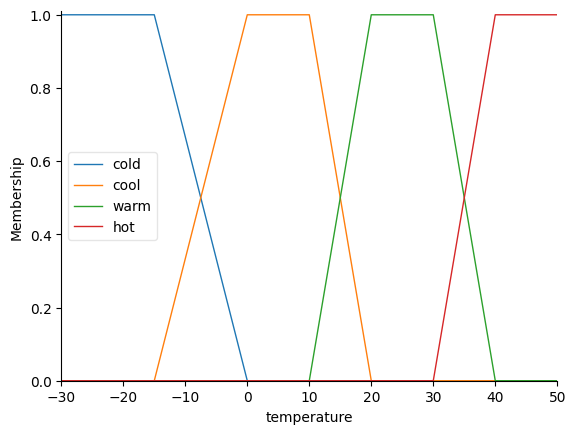

In [27]:
# Input: Temperature (-30°C to 50°C)
temperature = ctrl.Antecedent(np.arange(-30, 51, 1), 'temperature')
temperature['cold'] = fuzz.trapmf(temperature.universe, [-30, -30, -15, 0])
temperature['cool'] = fuzz.trapmf(temperature.universe, [-15, 0, 10, 20])
temperature['warm'] = fuzz.trapmf(temperature.universe, [10, 20, 30, 40])
temperature['hot'] = fuzz.trapmf(temperature.universe, [30, 40, 50, 50])

# Plot membership functions for temperature
temperature.view()
plt.show()


## Task 2

Create fuzzy sets low, medium, high for heating.

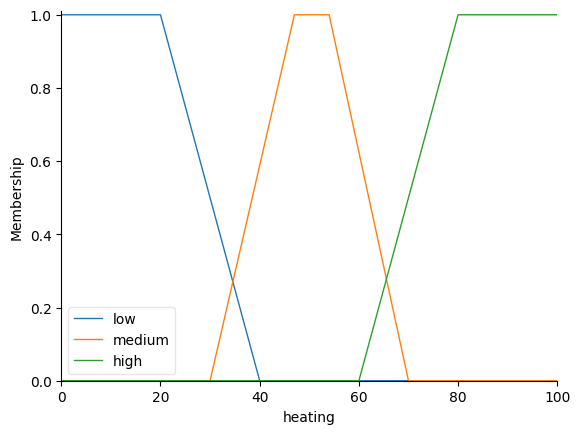

In [28]:
# Input: Heating (0% to 100%)
heating = ctrl.Antecedent(np.arange(0, 101, 1), 'heating')
heating['low'] = fuzz.trapmf(heating.universe, [0, 0, 20, 40])
heating['medium'] = fuzz.trapmf(heating.universe, [30, 47, 54, 70])
heating['high'] = fuzz.trapmf(heating.universe, [60, 80, 100, 100])

# Plot membership functions for heating
heating.view()
plt.show()


## Task 3

Create fuzzy sets closed, partially, half, nearly, open.

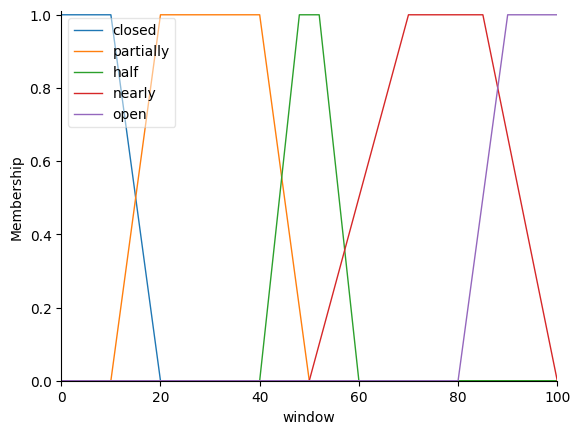

In [29]:
# Input: Window (0% to 100%)
window = ctrl.Antecedent(np.arange(0, 101, 1), 'window')
window['closed'] = fuzz.trapmf(window.universe, [0, 0, 10, 20])
window['partially'] = fuzz.trapmf(window.universe, [10, 20, 40, 50])
window['half'] = fuzz.trapmf(window.universe, [40, 48,52, 60])
window['nearly'] = fuzz.trapmf(window.universe, [50, 70, 85, 100])
window['open'] = fuzz.trapmf(window.universe, [80, 90, 100, 100])

# Plot membership functions for window
window.view()
plt.show()


## Task 4
Create the fuzzy output ( comfortable ) .

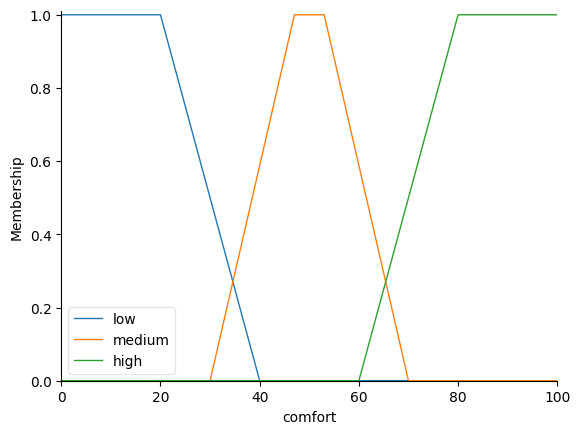

In [30]:
# Output: Comfort (0% to 100%)
comfort = ctrl.Consequent(np.arange(0, 101, 1), 'comfort')
comfort['low'] = fuzz.trapmf(comfort.universe, [0, 0, 20, 40])
comfort['medium'] = fuzz.trapmf(comfort.universe, [30, 47, 53, 70])
comfort['high'] = fuzz.trapmf(comfort.universe, [60, 80, 100, 100])

# Plot membership functions for comfort
comfort.view()
plt.show()


## Task 5
Define fuzzy rules for Comfort based on window, temperature, and heating

In [47]:
rule1 = ctrl.Rule(temperature['cold'] & window['closed'] & heating['high'], comfort['high'])
rule2 = ctrl.Rule(temperature['cold'] & window['partially'] & heating['high'], comfort['medium'])
rule3 = ctrl.Rule(temperature['cold'] & window['open'] & heating['medium'], comfort['low'])

rule4 = ctrl.Rule(temperature['cool'] & window['closed'] & heating['high'], comfort['high'])
rule5 = ctrl.Rule(temperature['cool'] & window['closed'] & heating['medium'], comfort['medium'])
rule6 = ctrl.Rule(temperature['cool'] & window['closed'] & heating['low'], comfort['medium'])

rule7 = ctrl.Rule(temperature['cool'] & window['partially'] & heating['high'], comfort['high'])
rule8 = ctrl.Rule(temperature['cool'] & window['partially'] & heating['medium'], comfort['medium'])
rule9 = ctrl.Rule(temperature['cool'] & window['partially'] & heating['low'], comfort['medium'])

rule10 = ctrl.Rule(temperature['cool'] & window['open'] & heating['medium'], comfort['low'])
rule11 = ctrl.Rule(temperature['cool'] & window['open'] & heating['low'], comfort['low'])

rule12 = ctrl.Rule(temperature['warm'] & window['closed'] & heating['high'], comfort['high'])
rule13 = ctrl.Rule(temperature['warm'] & window['closed'] & heating['medium'], comfort['medium'])
rule14 = ctrl.Rule(temperature['warm'] & window['closed'] & heating['low'], comfort['medium'])

rule15 = ctrl.Rule(temperature['warm'] & window['partially'] & heating['high'], comfort['high'])
rule16 = ctrl.Rule(temperature['warm'] & window['partially'] & heating['medium'], comfort['medium'])
rule17 = ctrl.Rule(temperature['warm'] & window['partially'] & heating['low'], comfort['medium'])

rule18 = ctrl.Rule(temperature['warm'] & window['open'] & heating['high'], comfort['medium'])
rule19 = ctrl.Rule(temperature['warm'] & window['open'] & heating['medium'], comfort['low'])
rule20 = ctrl.Rule(temperature['warm'] & window['open'] & heating['low'], comfort['low'])

rule21 = ctrl.Rule(temperature['hot'] & window['closed'] & heating['high'], comfort['medium'])
rule22 = ctrl.Rule(temperature['hot'] & window['closed'] & heating['medium'], comfort['low'])
rule23 = ctrl.Rule(temperature['hot'] & window['closed'] & heating['low'], comfort['low'])

rule24 = ctrl.Rule(temperature['hot'] & window['partially'] & heating['high'], comfort['low'])
rule25 = ctrl.Rule(temperature['hot'] & window['partially'] & heating['medium'], comfort['low'])
rule26 = ctrl.Rule(temperature['hot'] & window['partially'] & heating['low'], comfort['low'])

rule27 = ctrl.Rule(temperature['hot'] & window['open'] & heating['high'], comfort['low'])
rule28 = ctrl.Rule(temperature['hot'] & window['open'] & heating['medium'], comfort['low'])
rule29 = ctrl.Rule(temperature['hot'] & window['open'] & heating['low'], comfort['low'])


## Task 6 
Create Fuzzy Control System and Combine rules into a control system

In [53]:
# Combine rules into a control system
comfort_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6,
    rule7, rule8, rule9, rule10, rule11, rule12,
    rule13,rule14,rule15,rule16,rule17,rule18,
    rule19,rule20,rule21,rule22,rule23,rule24,
    rule25,rule26,rule27,rule28,rule29
])

# Create a simulation object
comfort_sim = ctrl.ControlSystemSimulation(comfort_ctrl)


## Task 7
Lets test the fuzzy system

In [55]:
# Set input values within the defined range
comfort_sim.input['window'] = 30  # Window partially open
comfort_sim.input['temperature'] = 10  # Cool temperature
comfort_sim.input['heating'] = 70  # Medium heating level

# Debug: Display input values
print("Input values:")
print(f"Window: 30")         # Directly print as the input is being set
print(f"Temperature: 10")
print(f"Heating: 70")

comfort_sim.compute()  # Compute comfort level based on inputs
# Print the result of the output variable
print(f"Comfort level: {comfort_sim.output['comfort']:.2f}%")

Input values:
Window: 30
Temperature: 10
Heating: 70
Comfort level: 82.38%
